## 한글 워드클라우드 - 추석 선물

In [1]:
import re, nltk
from konlpy.tag import Okt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

- 한글 텍스트 전처리

In [2]:
with open('data/추석선물.txt') as file:
    text = file.read()

In [3]:
okt = Okt()
tokens = okt.nouns(text)     # 문장에서 명사 추출
tokens[:10]

['부모님', '추석', '선물', '것', '선물', '라면', '부모님', '선호', '제품', '선물']

In [4]:
# 영문자, 숫자, 구둣점 제거
new_tokens = []
for token in tokens:
    item = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '', token)      # 문장일때 [^ㄱ-ㅎㅏ-ㅣ가-힣 ] 스페이스 추가
    if item:        # 빈 문자열이면 False, 즉, 빈 문자열이 아닌 것만 추가
        new_tokens.append(item)

- 불용어 정리
    - 아래 두 과정을 만족할 때까지 반복

In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

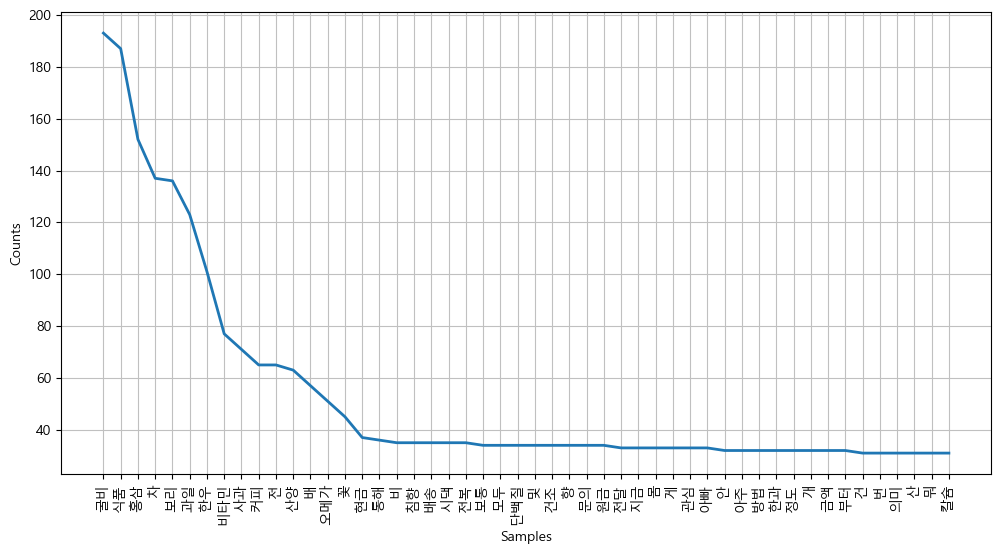

In [14]:
gift = nltk.Text(new_tokens, name='추석 선물')
plt.figure(figsize=(12,6))
gift.plot(50);      # Text.plot / Series

In [13]:
stoptext = """
        선물 추석 세트 수 것 추천 부모님 제품 등 선택 이 저 명절 가격 고민 도움 분 요 제 더 구매 링크 아래
        고려 때 참고 마음 제공 생각 수수료 포장 기능 요즘 종류 고금 가지 선생님 답변 할인 맛 건강 거 면역
        고급 활동 한번 사람 곳 음식 쿠팡 상품 가족 준비 이번 하나 스 용 부담 질문 파트너 예 위 가장 여기 사용
        저희 성분 회복 포함 때문 일환 자주 제일 관리 좀 경우 정액 어르신 확인 포스팅 해 중 브랜드 판매 보시
        아이디어 센스 취향 크기 인기 양제 당뇨 이상 삼 걸 효과 주문 혈액 운동 정말 이벤트 용품 순환 관절 임금님
        사이트 시간 일 위해 피로 기 직접 직원 드릴 마사지 어른 상품권 산삼 다른 채택 품질 영양 바로 정리 회사
        라면 집 개선 최고 지급 간식 자 백화점 요리 가성 실용 구성 더욱 예약 아이 동해 나이 그 하루 일반
"""

stop_words = stoptext.split()
new_tokens = [token for token in new_tokens if token not in stop_words]
new_tokens[:10]

['선호', '선호', '테크', '안마', '의자', '안마', '의자', '테크', '음파', '진동']

- 워드 클라우드 그리기

In [16]:
gift.vocab().most_common(5)

[('굴비', 193), ('식품', 187), ('홍삼', 152), ('차', 137), ('보리', 136)]

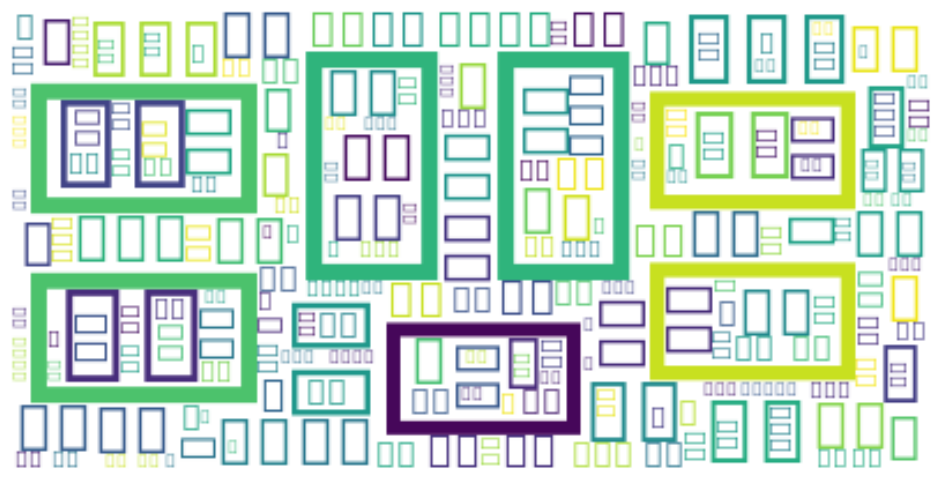

In [18]:
wc = WordCloud(
    background_color='white', random_state=2023
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

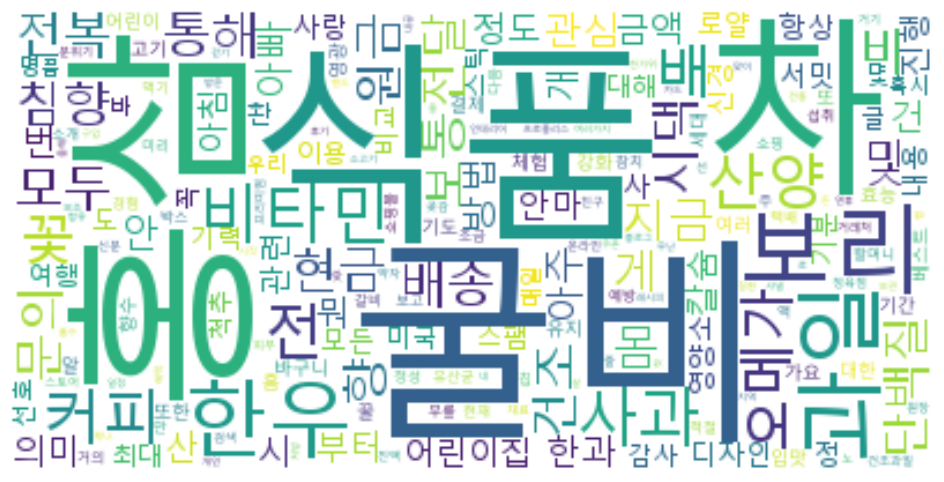

In [24]:
wc = WordCloud(
    background_color='white', random_state=2023,
    # font_path='C:/Users/human/AppData/Local/Microsoft/Windows/Fonts/NanumMyeongjo.ttf'
    font_path='C:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.4
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off');

- 그림 위에 표시

In [29]:
mask = np.array(Image.open('data/heart.jpg'))

from wordcloud import ImageColorGenerator
image_color = ImageColorGenerator(mask)

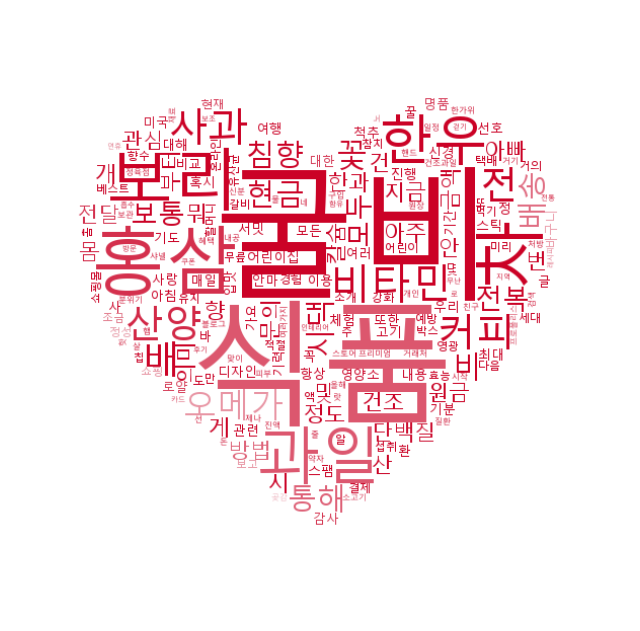

In [30]:
wc = WordCloud(
    background_color='white', random_state=2023,
    mask=mask,
    # font_path='C:/Users/human/AppData/Local/Microsoft/Windows/Fonts/NanumMyeongjo.ttf'
    font_path='C:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.4
).generate_from_frequencies(dict(gift.vocab().most_common(300)))

plt.figure(figsize=(8,8))
plt.imshow(wc.recolor(color_func=image_color), interpolation='bilinear')
plt.axis('off');